In [1]:
import numpy as np
import matplotlib.pyplot as plt

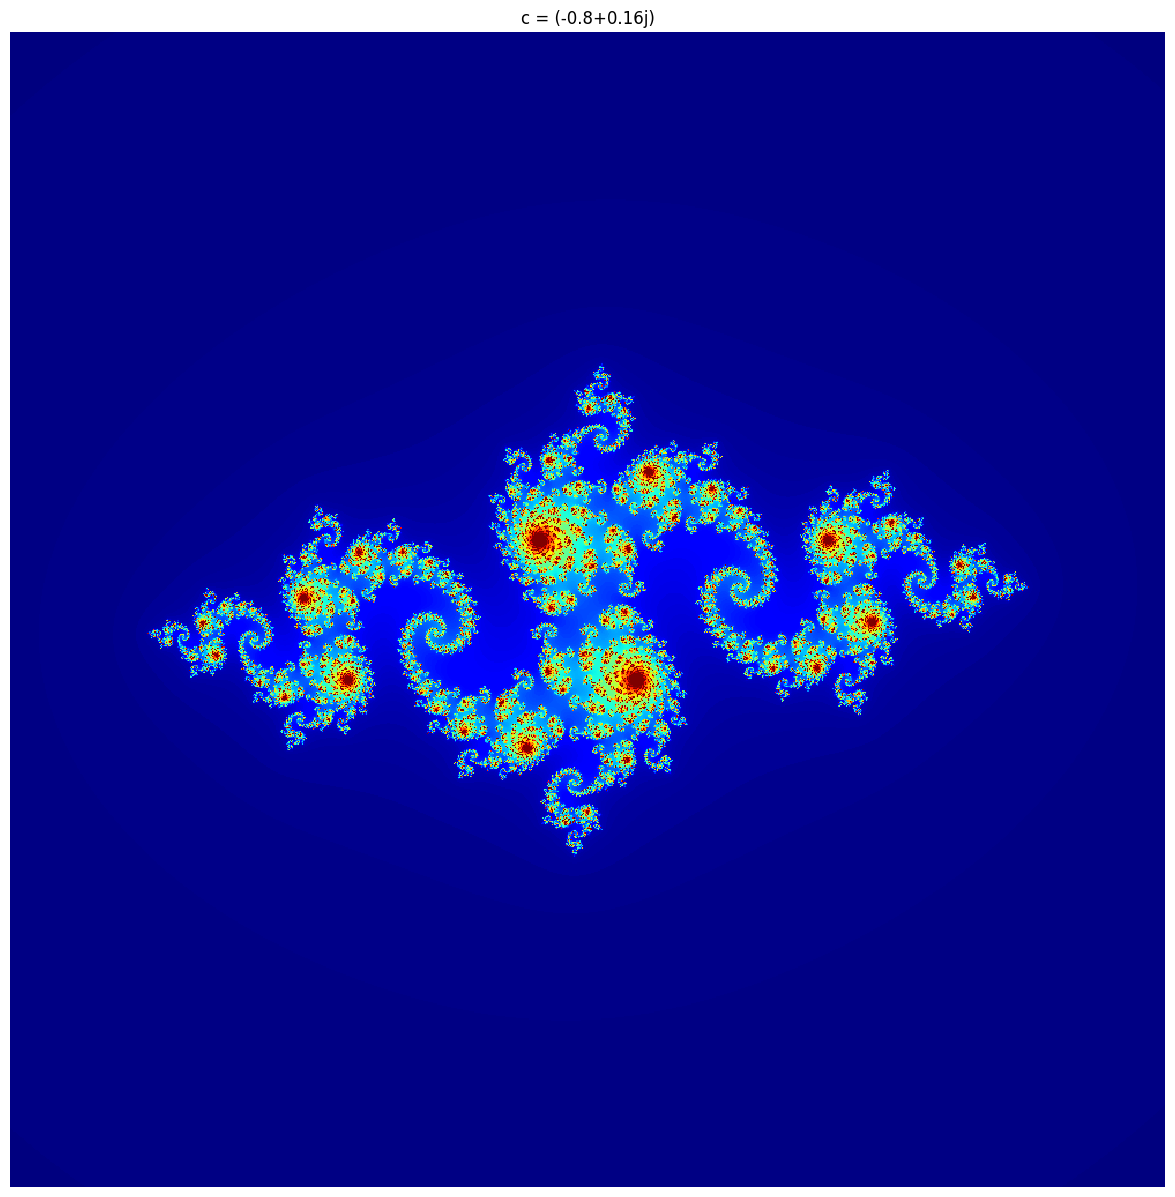

In [4]:
"""
Adapted from:
https://blbadger.github.io/julia-sets.html
scipython.com
"""


# Image width and height; parameters for the plot
im_width, im_height = 1000, 1000
xmin, xmax = -2, 2
xwidth = xmax - xmin
ymin, ymax = -2, 2
yheight = ymax - ymin

c = -0.8 + 0.16j
# The boundary that determines divergence (max distance from the origion).
zabs_max = 50
# If after a sufficiently large number of iterations, the point is still bounded,
# then we can assume that the value will not diverge in the future.
# We will denote this number "max_iterations".
max_iterations = 200


data = np.zeros((im_width, im_height))
for i in range(im_width):
    for j in range(im_height):
        nth_iteration = 0
        # Map pixel position to a point on the complex plane
        z = complex((i/im_width) * xwidth + xmin, (j/im_height) * yheight + ymin)
        # Do the iterations max_iterations number of times and if
        # the size of z is still not greater than zabs_max, we can safely conclude
        # it is bounded and will not diverge.
        while abs(z) <= zabs_max and nth_iteration < max_iterations:
            z = z**2 + c
            nth_iteration += 1
        color = nth_iteration / max_iterations
        data[j, i] = color


fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(data, interpolation='nearest', cmap="jet")
ax.set_title(f"c = {c}")
ax.axis("off");

In [2]:
"""
Defining a function:
"""
def make_Julia(c, max_iterations=200):
    c = c
    data = np.zeros((im_width, im_height))
    for i in range(im_width):
        for j in range(im_height):
            nth_iteration = 0
            # Map pixel position to a point on the complex plane
            z = complex((i/im_width) * xwidth + xmin, (j/im_height) * yheight + ymin)
            # Do the iterations max_iterations number of times and if
            # the size of z is still not greater than zabs_max, we can safely conclude
            # it is bounded and will not diverge.
            while abs(z) <= zabs_max and nth_iteration < max_iterations:
                z = z**2 + c
                nth_iteration += 1
            color = nth_iteration / max_iterations
            data[j, i] = color
    return data

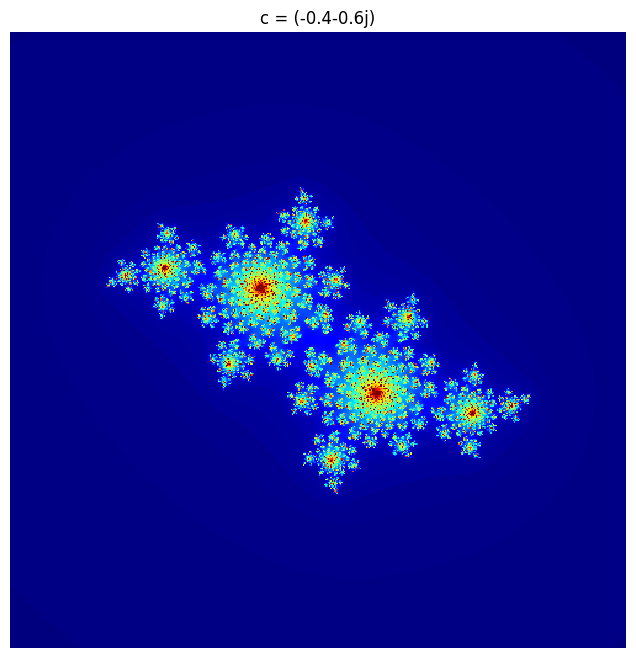

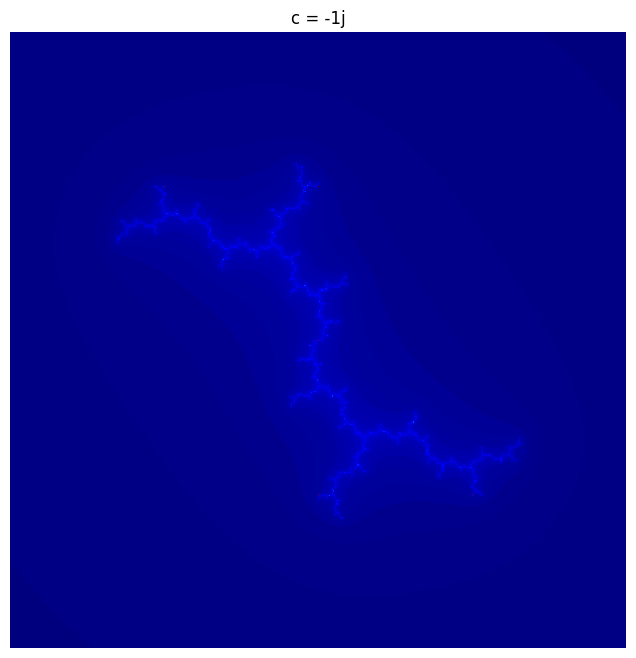

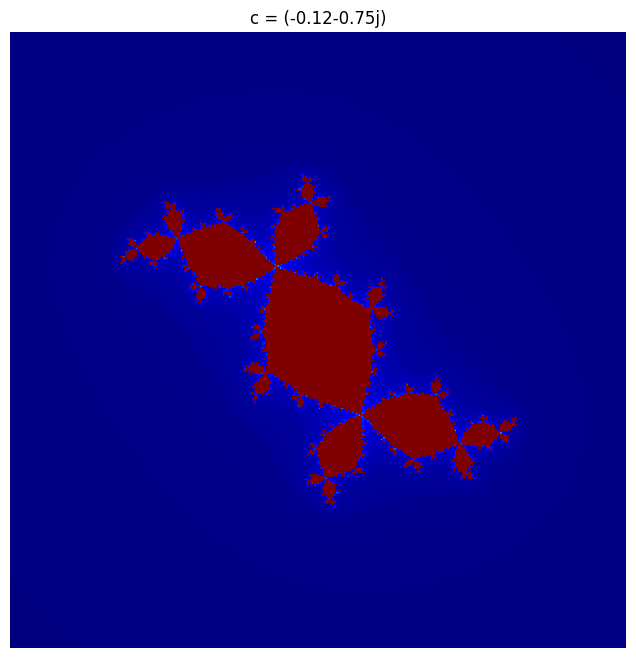

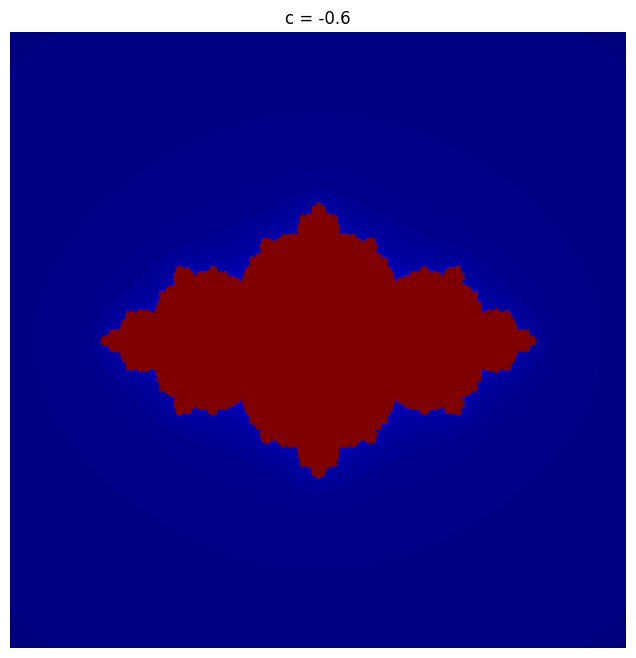

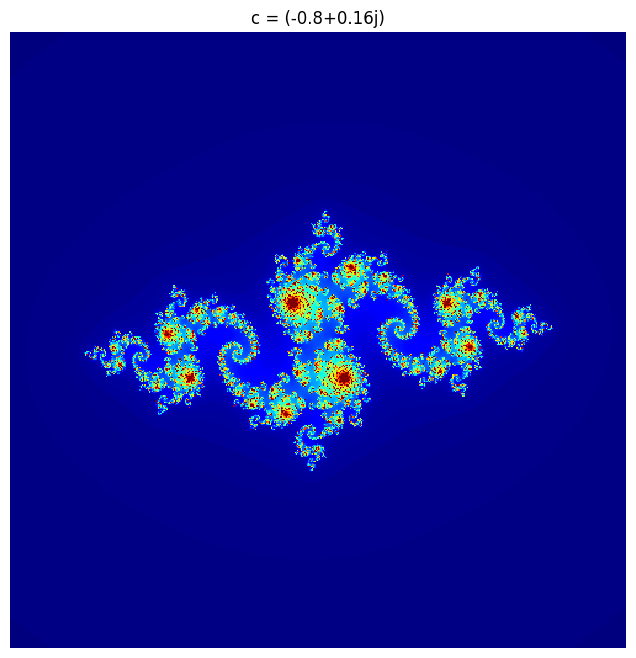

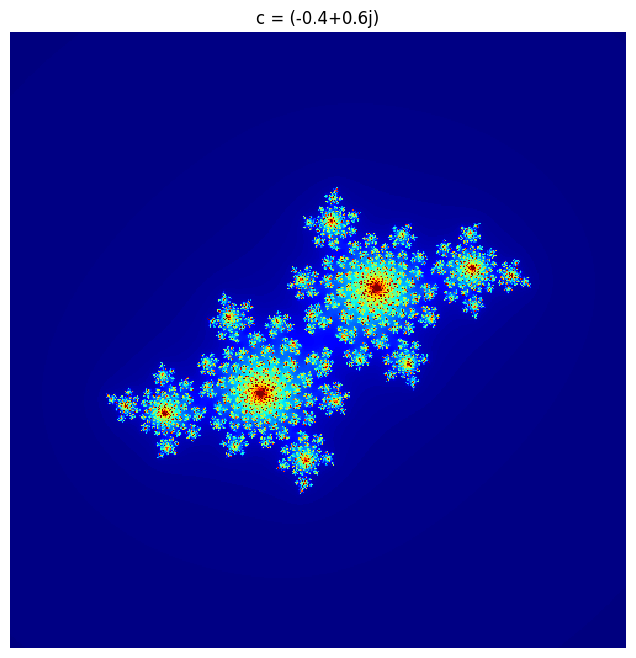

In [21]:
"""
Creating all the 6 images and saving them.
"""
for c in [(-0.4-0.6j), (0-1j), (-0.12-0.75j), (-0.6), (-0.8+0.16j), (-0.4+0.6j)]:
    fig, ax = plt.subplots(figsize=(8,8))
    ax.imshow(make_Julia(c), interpolation='nearest', cmap="jet")
    ax.set_title(f"c = {c}")
    ax.axis("off");
    fig.savefig(f"JuliaSet{c}.jpg")

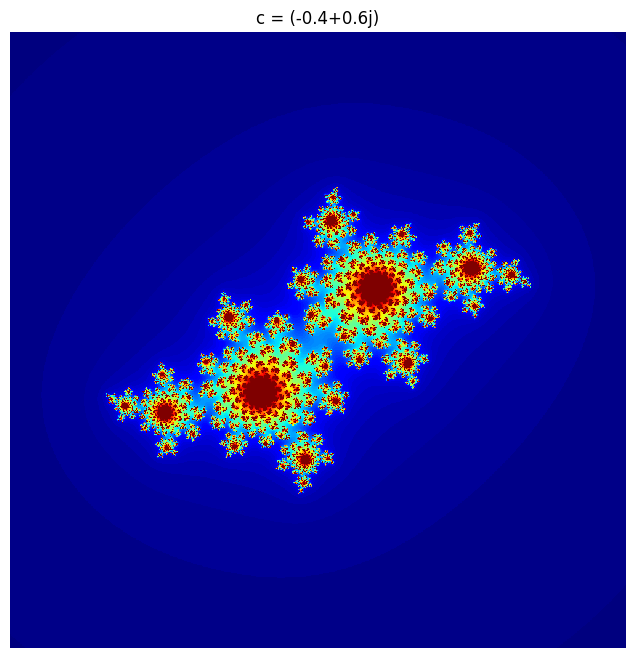

In [10]:
fig, ax = plt.subplots(figsize=(8,8))
c = -0.4 + 0.6j
ax.imshow(make_Julia(c, max_iterations=100), interpolation='nearest', cmap="jet")
ax.set_title(f"c = {c}")
ax.axis("off");
fig.savefig(f"JuliaSet{c}.jpg")